<a href="https://colab.research.google.com/github/LunaPedro17/IA/blob/main/Sets_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
datos = pd.read_csv("U4_01_housing.csv")
datos.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
datos["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [6]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
datos.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

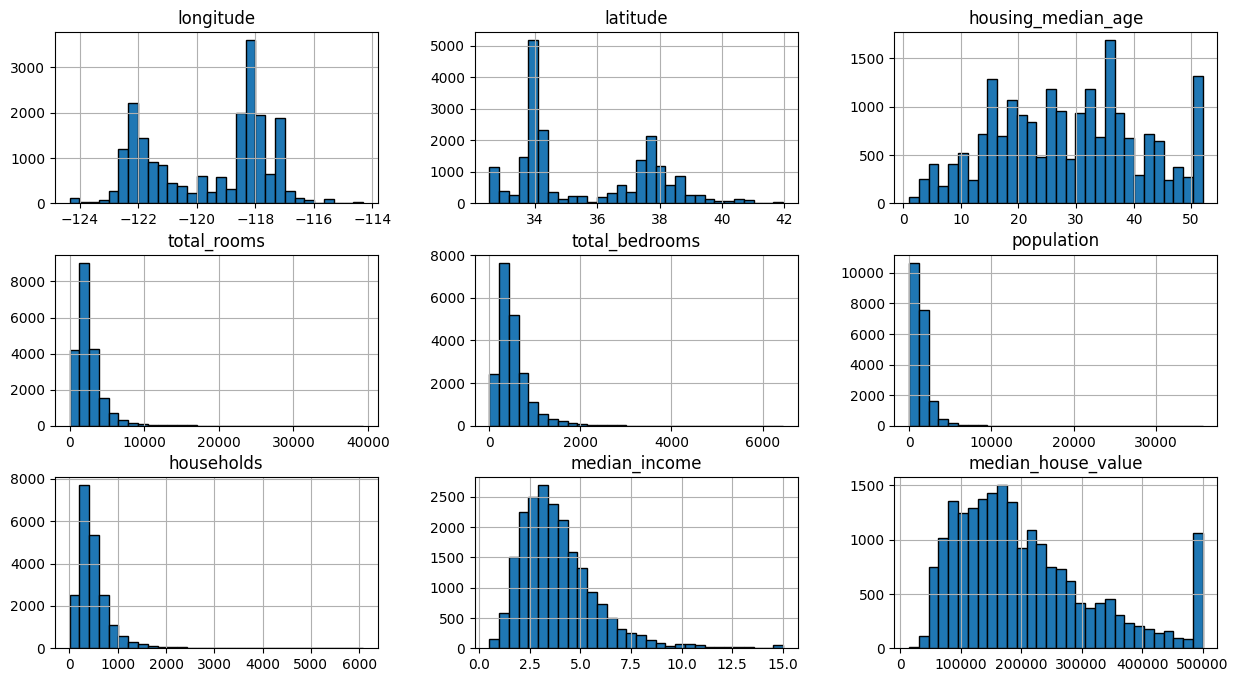

In [11]:
datos.hist(bins=30, figsize=(15,8),edgecolor="black")

TypeError: cannot convert the series to <class 'float'>

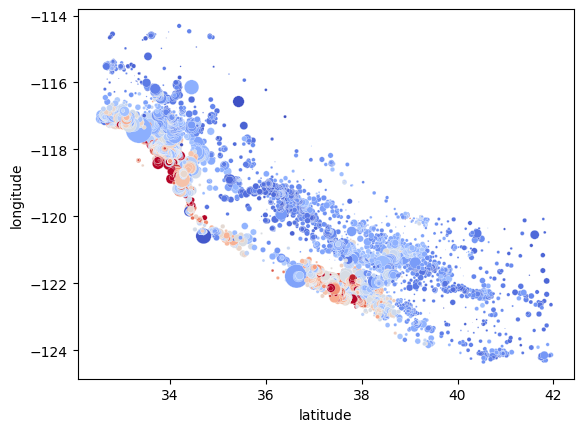

In [18]:
import seaborn as sb
sb.scatterplot(x="latitude",y="longitude",data=datos, hue="median_house_value",palette="coolwarm", s=datos["population"]/100)

<Axes: xlabel='latitude', ylabel='longitude'>

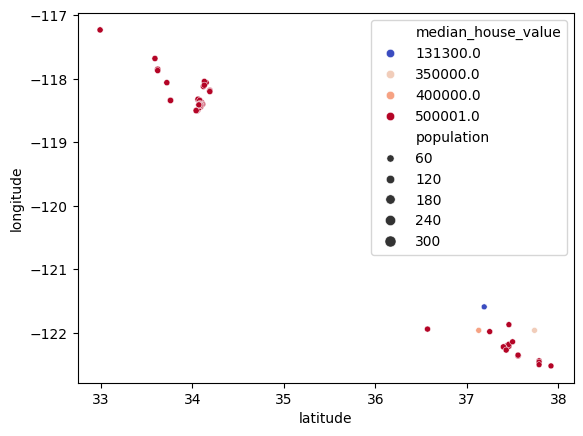

In [21]:
sb.scatterplot(x="latitude",y="longitude",data=datos[(datos.median_income>14)], hue="median_house_value",palette="coolwarm", size=datos["population"]/100)

In [25]:
datos.info()
datos_na=datos.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [27]:
#convertir categoria a numerica
datos_na["ocean_proximity"].value_counts()
dumies = pd.get_dummies(datos_na["ocean_proximity"],dtype=int)
datos_na= datos_na.join(dumies)


In [28]:
datos_na.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0


In [36]:
datos_na=datos_na.drop("ocean_proximity",axis=1)

KeyError: "['ocean_proximity'] not found in axis"

In [37]:
datos_na.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


<Axes: >

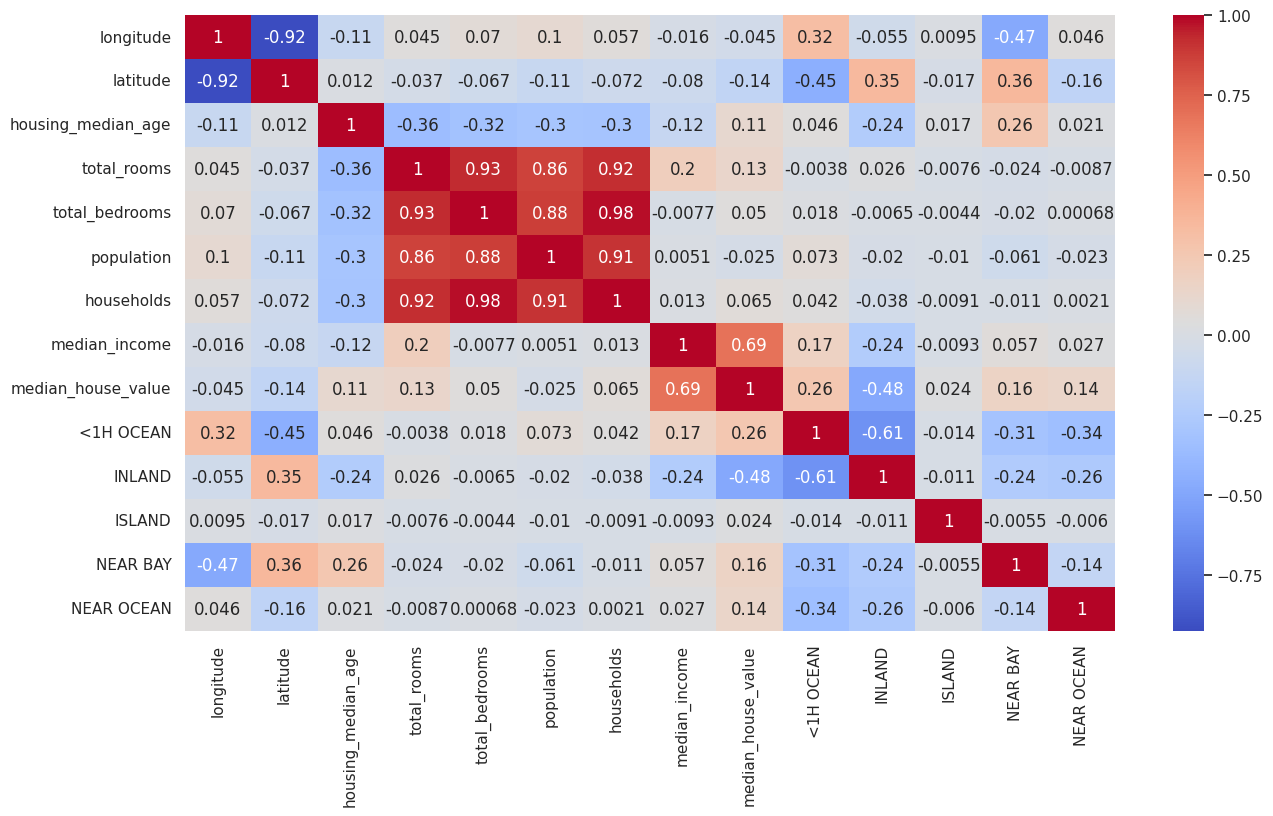

In [39]:
sb.set(rc={'figure.figsize':(15,8)})
sb.heatmap(datos_na.corr(), annot=True, cmap="coolwarm")

In [41]:
datos_na.corr()["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688355
<1H OCEAN,0.257614
NEAR BAY,0.160526
NEAR OCEAN,0.140378
total_rooms,0.133294
housing_median_age,0.106432
households,0.064894
total_bedrooms,0.049686
ISLAND,0.023525


<Axes: xlabel='median_house_value', ylabel='median_income'>

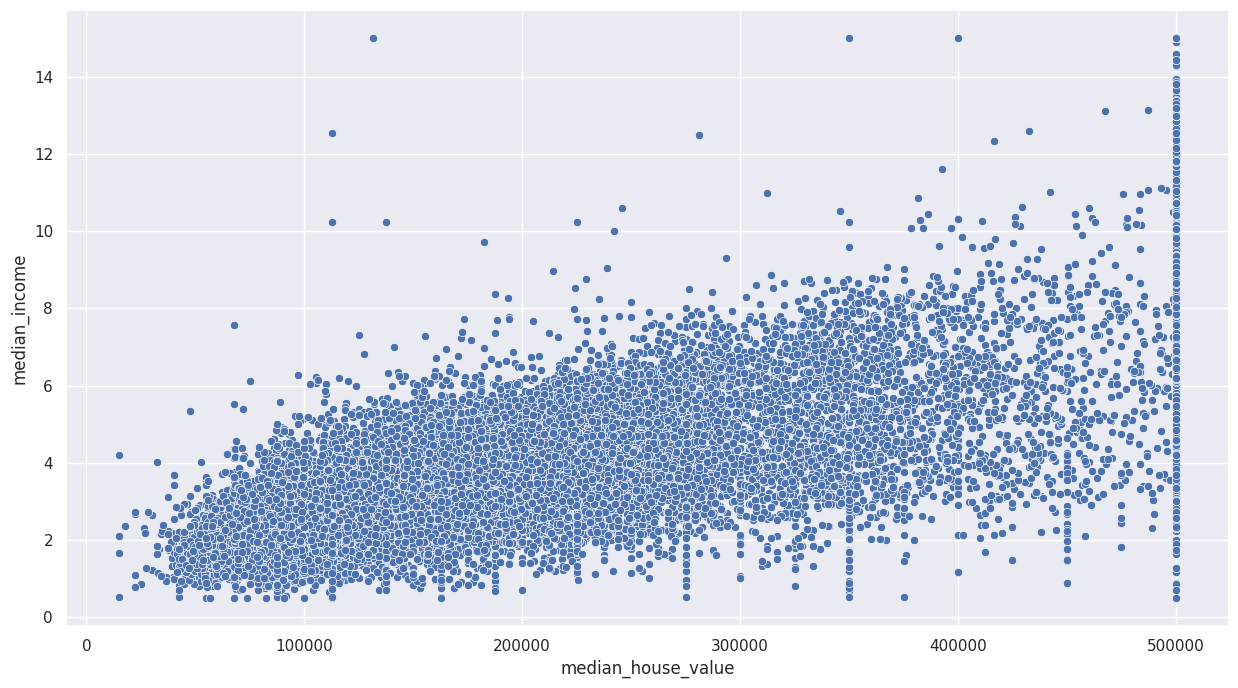

In [42]:
sb.scatterplot(y=datos_na["median_income"],x=datos_na["median_house_value"],data=datos_na)

In [43]:
datos_na["bedroom_ratio"]=datos_na["total_bedrooms"]/datos_na["total_rooms"]

<Axes: >

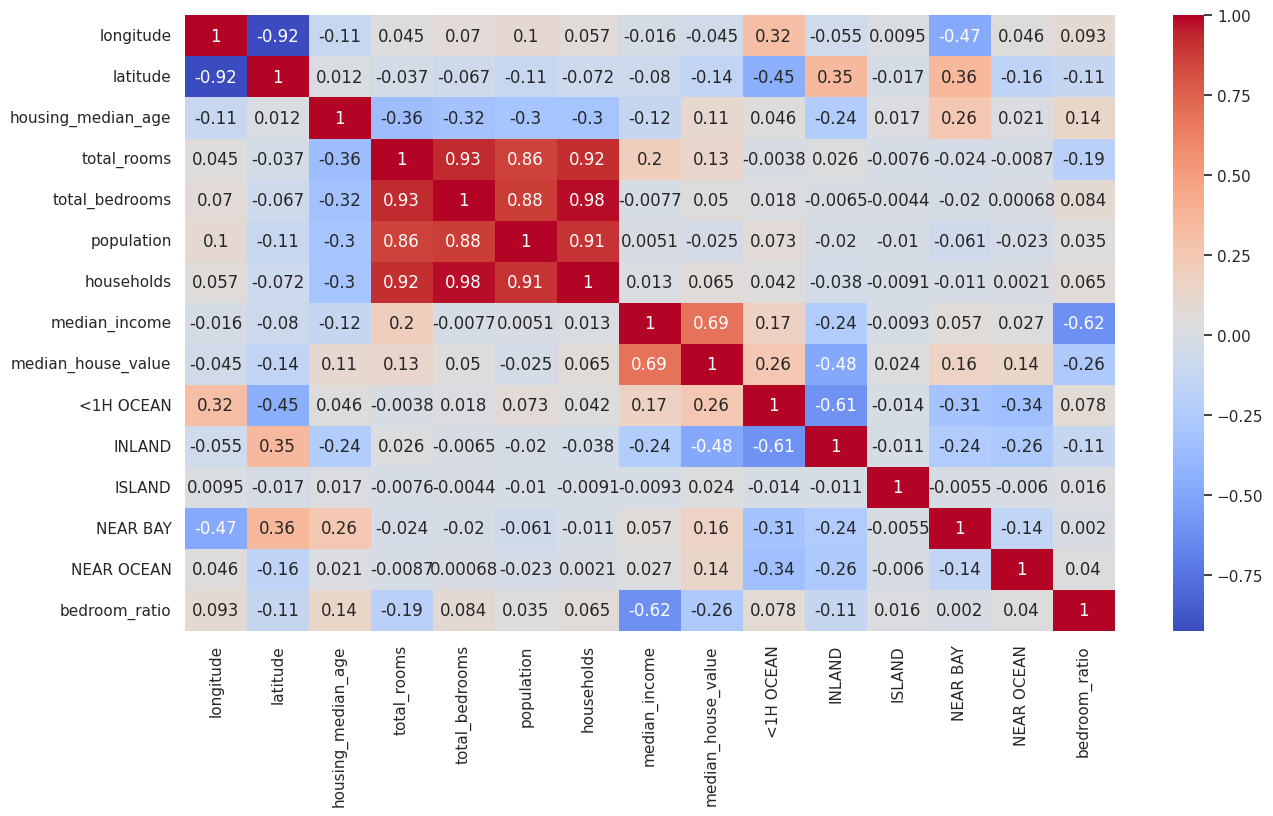

In [44]:
sb.set(rc={'figure.figsize':(15,8)})
sb.heatmap(datos_na.corr(), annot=True, cmap="coolwarm")

In [45]:
#separar caracteristicas
x=datos_na.drop("median_house_value",axis=1)
y=datos_na["median_house_value"]

In [46]:
#separar datos en 2 partes: entrenamiento y pruebas
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [48]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()

In [49]:
modelo.fit(x_train,y_train)

LinearRegression()

In [50]:
prediccione=modelo.predict(x_test)

In [53]:
comparativa={"Real":y_test,"Prediccion":prediccione}
pd.DataFrame(comparativa)

,Real,Prediccion
17482,288900.0,284347.918374
13979,42500.0,-23269.055028
14091,122700.0,172699.302696
15983,359600.0,241836.084004
18600,284100.0,310700.694057
...,...,...
6443,233100.0,149301.322915
17037,349600.0,272294.072142
8795,500001.0,542012.556104
1096,87500.0,89108.025770


In [54]:
#grado de overfitting
print(modelo.score(x_train,y_train))
print(modelo.score(x_test,y_test))

0.6526315884686933
0.6493967019570345


In [57]:
#error
from sklearn.metrics import mean_squared_error
import numpy as np
mse = mean_squared_error(y_test,prediccione)
print(mse)

4562473160.802459


In [59]:
rmse=np.sqrt(mse)
print(rmse)

67546.08175758575


In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [61]:
pd.DataFrame(x_train_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-1.482511,1.101306,1.849604,-0.402959,-0.529316,-0.720078,-0.618248,0.863573,-0.894994,-0.678030,-0.015645,2.819026,-0.383625,-0.580504
1,0.808444,-0.829316,0.500551,-0.072149,-0.255746,-0.082249,-0.191419,0.706197,1.117326,-0.678030,-0.015645,-0.354732,-0.383625,-0.681390
2,-0.629018,0.913867,0.103771,-0.509093,-0.672048,-0.588295,-0.681094,-0.109690,-0.894994,1.474861,-0.015645,-0.354732,-0.383625,-0.790293
3,0.274387,-0.140478,-0.213654,0.485173,0.683909,0.567000,0.856015,-0.904797,-0.894994,1.474861,-0.015645,-0.354732,-0.383625,0.182977
4,-1.217978,0.787345,-0.451722,1.934762,1.283385,1.339247,1.474001,1.318138,1.117326,-0.678030,-0.015645,-0.354732,-0.383625,-0.966866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16341,1.117897,-0.684051,-1.880130,0.957036,1.430875,0.999248,1.455671,-0.465790,-0.894994,1.474861,-0.015645,-0.354732,-0.383625,0.492272
16342,-1.183040,0.754544,-0.769146,-0.410769,-0.581651,-0.698114,-0.578969,0.908982,1.117326,-0.678030,-0.015645,-0.354732,-0.383625,-0.769151
16343,0.768514,-0.735597,0.579907,-0.742957,-0.555484,-0.105092,-0.544928,-0.910071,1.117326,-0.678030,-0.015645,-0.354732,-0.383625,1.497454
16344,-1.382687,0.909181,-0.054941,0.512741,0.976510,0.232272,0.905768,0.053751,-0.894994,-0.678030,-0.015645,-0.354732,2.606712,0.689417
